# Calcul d'une intégrale

L'objectif de ce TP consiste à étudier les différentes manières de calculer l'intégrale d'une fonction $f(x)$, et d'étudier en particulier la convergence et la précision.

Le principe de calcul le plus intuitif consiste à subdiviser l'intervalle d'intégration $[a,b]$ en $N$ sous-intervalles d'égale longueur, d'approximer la valeur de l'intégrale dans chacun des sous-intervalles et d'écrire l'intégrale totale comme la somme des sous-intégrales. La formulation la plus simple vient en fait de la somme de Rieman.

Le nombre de sous-intervalles $N$ est important car il conditionne le temps de calcul et la précision dans le calcul :
* le temps de calcul : de manière évidente, plus $N$ est grand et plus on a un grand nombre de sous-intégrales à calculer, ce qui augmente donc le temps de calcul
* la précision : si $N$ est trop faible, l'approximation des sous-intégrales risque d'être grossière et on obtiendra une précision finale médiocre ; on peut légitimement penser que la précision augmente avec $N$.

On a donc un compromis à trouver entre le temps de calcul et la précision. Pour cela on va s'intéresser aux différentes méthodes classiques disponibles et analyser leur convergence.

## Subdivision de l'intervalle d'intégration

Ce point est commun à toutes les méthodes d'intégration ci-dessous. Si l'on subdivise l'intervalle d'intégration $[a,b]$ en $N$ sous-intervalles d'égale longueur, chacun des sous-intervalles est alors de longueur
$$h=\frac{b-a}{N}$$
On suppose ici que l'on a $b>a$.

Les $N$ sous-intervalles sont alors définis par $[x_i, x_{i+1}]$, $0\leq i\leq N$, avec $x_i=a+ih$ ($x_0=a$ et $x_N=b$). On a alors $N+1$ points $x_i$ équi-répartis entre $a$ et $b$.

## La méthode des rectangles

La méthode des rectangles est la méthode la plus immédiate puisqu'elle consiste à considérer que la fonction a une valeur constante dans chacun des intervalles $[x_i, x_{i+1}]$, de sorte que le calcul de l'intégrale correspondante est immédiat.

Cette méthode suppose que la fonction varie effectivement très peu à l'échelle de la longueur $h$ de chacun des sous-intervalles.

Cette méthode peut donner lieu à différentes implémentations selon la valeur que l'on considère pour la fonction. On a ainsi
* la méthode des rectangles à gauche : dans l'intervalle $[x_i, x_{i+1}]$ la fonction est supposée constante égale à $f(x_i)$, ce qui nous donne la formule finale
$$\int_a^bf(x)dx\simeq h\sum_{i=0}^{N-1}f(x_i)$$
* la méthode des rectangles à droite : dans l'intervalle $[x_i, x_{i+1}]$ la fonction est supposée constante égale à $f(x_{i+1})$, ce qui nous donne la formule finale
$$\int_a^bf(x)dx\simeq h\sum_{i=1}^{N}f(x_i)$$
* la méthode des rectangles point milieu : dans l'intervalle $[x_i, x_{i+1}]$ la fonction est supposée constante égale à $f(x_i+h/2)$, ce qui nous donne la formule finale
$$\int_a^bf(x)dx\simeq h\sum_{i=0}^{N-1}f(x_i+h/2)$$

Sans chercher à implémenter ces différentes approches, comment pourriez-vous les comparer en terme de précision ?

## La méthode des trapèzes

Considérant que la méthode des rectangles est un peu trop grossière, on peut écrire que la fonction $f(x)$ a un comportement linéaire dans chaque sous-intervalle $[x_i, x_{i+1}]$, ce qui revient à assimiler localement la fonction à sa tangente. Faisant cela on peut intuitivement s'attendre à mieux suivre les évolutions de la fonction, et donc obtenir une précision meilleure dans le calcul de l'intégrale.

L'interpolation linéaire de la fonction $f(x)$ entre les points $(x_i, f(x_i))$ et $(x_{i+1}, f(x_{i+1}))$ s'écrit simplement
$$f(x)\simeq f(x_i)+\frac{f(x_{i+1})-f(x_i)}{h}(x-x_i)$$

L'intégrale élémentaire ce l'intervalle $[x_i, x_{i+1}]$ est simple à calculer
$$\int_{x_i}^{x_{i+1}}f(x)dx\simeq hf(x_i)+
\frac{f(x_{i+1})-f(x_i)}{h}\frac{h^2}{2}=h\frac{f(x_{i+1})+f(x_i)}{2}$$
Il reste alors simplement à sommer toutes ces contributions élémentaires et on obtient la formule des trapèzes sous la forme
$$\int_a^bf(x)dx\simeq h\left[\frac{f(a)+f(b)}{2}+\sum_{i=1}^{N-1}f(x_i)\right]$$

Sans chercher à implémenter cette méthode, comment pourriez-vous la comparer en terme de précision avec les 3 méthodes des rectangles précédentes ?

## La méthode de Simpson

Le principe de la méthode de Simpson est similaire à la méthode précédente, elle repose sur une interpolation quadratique de la fonction $f(x)$ dans chaque intervalle élémentaire $[x_i, x_{i+1}]$. Les coefficients de l'interpolation quadratique sont tels que la fonction coïncide avec son interpolation aux deux points extrèmes de l'intervalle $x_i$ et $x_{i+1}$, ainsi qu'au point médian $x_i+h/2$.

On peut écrire l'interpolation sous la forme
$$f(x)\simeq f(x_i)+\alpha(x-x_i)+\beta(x-x_i)^2$$
avec les deux conditions suivantes
* $\alpha h/2+\beta h^2/4=f(x_i+h/2)-f(x_i)$
* $\alpha h+\beta h^2=f(x_{i+1})-f(x_i)$

On peut alors en déduire
$$\alpha h=4f(x_i+h/2)-3f(x_i)-f(x_{i+1})$$
et
$$\beta h^2=2f(x_{i+1})+2f(x_i)-4f(x_i+h/2)$$
On en déduit alors l'intégrale élémentaire

$$\int_{x_i}^{x_{i+1}}f(x)dx\simeq hf(x_i)+\alpha\frac{h^2}{2}+\beta\frac{h^3}{3}=
\frac{h}{6}\left[f(x_i)+f(x_{i+1})+4f(x_i+h/2)\right]$$

Il reste alors simplement à sommer toutes ces contributions élémentaires et on obtient la formule de Simpson sous la forme
$$\int_a^bf(x)dx\simeq \frac{h}{6}\left[f(a)+f(b)+2\sum_{i=1}^{N-1}f(x_i)+4\sum_{i=0}^{N-1}f(x_i+h/2)\right]$$

Sans chercher à implémenter cette méthode, comparer ces différentes approches en terme de précision attendue et du temps de calcul correspondant.

Quelle est la complexité numérique de ces différentes méthodes en fonction du paramètre $N$ ?


## Implémentation de ces différentes méthodes

On considère l'intégrale
$$I=\int_0^{\pi/2}\sin(x)dx=1$$

Ecrire les fonctions permettant de calculer, en fonction du nombre de subdivisions $N$ de l'intervalle $[0,\pi/2]$, l'intégrale par la méthode des rectangles (à gauche, à droite et point milieu), des trapèzes, de Simpson.

Représenter graphiquement le temps de calcul de chacune de ces méthodes en fonction de $N$. On pourra considérer $N$ variant entre 100 et 10000 par pas de 100.
Conclusions ?

Représenter graphiquement l'écart entre l'intégrale estimée et la valeur attendue pour chacune de ces méthodes en fonction de $N$.
Conclusions ?


In [130]:
# Définition de la fonction
import numpy as np
import mpmath as mp

def f(x):
    return(mp.sin(x))

In [131]:
import time
# Rectangle gauche
def rectangle_gauche(f,a,b,N):
    t1 = time.time()
    pas = (b-a)/N
    S = 0
    for k in range(N):
        S += f(a+k*pas)
    t2 = time.time()
    return(pas*S,t2-t1)

# Rectangle droit
def rectangle_droit(f,a,b,N):
    t1 = time.time()
    pas = (b-a)/N
    S = 0
    for k in range(1,N+1):
        S += f(a+k*pas)
    t2 = time.time()
    return(pas*S,t2-t1)

# Rectangle point-milieu
def rectangle_pt_milieu(f,a,b,N):
    t1 = time.time()
    pas = (b-a)/N
    S = 0
    for k in range(N):
        S += f(a+(k+1/2)*pas)
    t2 = time.time()
    return(pas*S,t2-t1)

print(rectangle_droit(f,0,np.pi/2,50))
print(rectangle_gauche(f,0,np.pi/2,50))
print(rectangle_pt_milieu(f,0,np.pi/2,50))
    

(mpf('1.0156257152116708'), 0.0015900135040283203)
(mpf('0.98420978867577291'), 0.001397848129272461)
(mpf('1.000041124535493'), 0.0008938312530517578)


In [132]:
# Méthode des trapèzes
def trap(f,a,b,N):
    t1 = time.time()
    pas = (b-a)/N
    S = 0
    for k in range(1,N):
        S += f(a+k*pas)
    t2 = time.time()
    return(pas*(S+(f(a)+f(b))/2),t2-t1)

print(trap(f,0,np.pi/2,50))

(mpf('0.99991775194372179'), 0.001840829849243164)


In [133]:
# Méthode de Simpson
import mpmath as mp
def simp(f,a,b,N):
    t1 = time.time()
    pas = (b-a)/N
    S = 0
    for k in range(N):
        S += 2*f(a+k*pas)+4*f(a+(k+1/2)*pas)
    t2 = time.time()
    return(mp.mpf(pas/6*(f(a)+f(b)+S)),t2-t1)

print(simp(f,0,np.pi/2,50))   

(mpf('1.0000000003382361'), 0.00410008430480957)


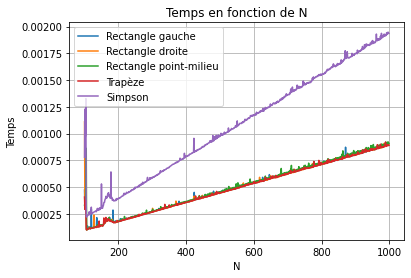

In [60]:
import matplotlib.pyplot as plt
n = [k for k in range(100,1000,1)]
time_rectg = []
time_rectd = []
time_rectm = []
time_trap = []
time_simp = []
for N in n:
    time_rectg.append(rectangle_gauche(f,0,np.pi/2,N)[1])
    time_rectd.append(rectangle_droit(f,0,np.pi/2,N)[1])
    time_rectm.append(rectangle_pt_milieu(f,0,np.pi/2,N)[1])
    time_trap.append(trap(f,0,np.pi/2,N)[1])
    time_simp.append(simp(f,0,np.pi/2,N)[1])
plt.plot(n,time_rectg)
plt.plot(n,time_rectd)
plt.plot(n,time_rectm)
plt.plot(n,time_trap)
plt.plot(n,time_simp)
plt.xlabel('N')
plt.ylabel('Temps')
plt.legend(['Rectangle gauche','Rectangle droite','Rectangle point-milieu','Trapèze','Simpson'])
plt.title('Temps en fonction de N')
plt.grid()

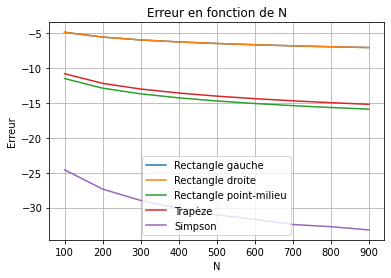

In [90]:
# Erreur
import matplotlib.pyplot as plt
import mpmath as mp
n = [k for k in range(100,1000,100)]
erf_rectg = []
erf_rectd = []
erf_rectm = []
erf_trap = []
erf_simp = []
for N in n:
    erf_rectg.append(mp.log(np.abs(1-rectangle_gauche(f,0,np.pi/2,N)[0])))
    erf_rectd.append(mp.log(np.abs(1-rectangle_droit(f,0,np.pi/2,N)[0])))
    erf_rectm.append(mp.log(np.abs(1-rectangle_pt_milieu(f,0,np.pi/2,N)[0])))
    erf_trap.append(mp.log(np.abs(1-trap(f,0,np.pi/2,N)[0])))
    erf_simp.append(mp.log(np.abs(1-simp(f,0,np.pi/2,N)[0])))
plt.plot(n,erf_rectg)
plt.plot(n,erf_rectd)
plt.plot(n,erf_rectm)
plt.plot(n,erf_trap)
plt.plot(n,erf_simp)
plt.xlabel('N')
plt.ylabel('Erreur')
plt.legend(['Rectangle gauche','Rectangle droite','Rectangle point-milieu','Trapèze','Simpson'])
plt.title('Erreur en fonction de N')
plt.grid()   


## Calcul en précision arbitraire

Refaire le même calcul de la méthode de Simpson en précision arbitraire à 20 chiffres significatifs, et à 50 chiffres significatifs. Qu'observez-vous ?

Le module Python pour les calculs en précision arbitraire est "mpmath".


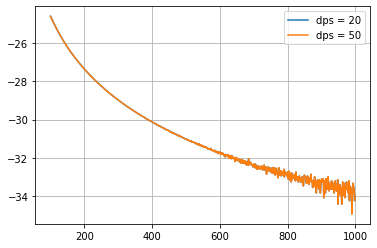

In [91]:
import mpmath as mp
import matplotlib.pyplot as plt
dps = [20,50]
n = [k for k in range(100,1000,1)]
for dp in dps :
    mp.dps = dp
    erf_simp = []
    for N in n:
        erf_simp.append(mp.log(np.abs(1-simp(f,0,mp.pi/2,N)[0])))
    plt.plot(n,erf_simp)
plt.legend(['dps = 20','dps = 50'])
plt.grid()

## Un exemple pathologique...

On va ici implémenter une méthode de Simpson pour calculer en fonction de paramètre $n$ l'intégrale
$$I_n=\int_0^{2\pi}\left(x+10^n\sin(x)\right)dx$$

Calculer $I_n$.

Calculer numériquement $I_1$, $I_5$, $I_{10}$, $I_{20}$. Commentaires ?


Refaire les mêmes calculs en précision arbitraire.

On choisira le nombre de chiffres significatifs nécessaires pour mener à bien ces calculs.

In [127]:
# Définition de la fonction
import numpy as np
import mpmath as mp

def f2(x,n):
    return(x+10**n*mp.sin(x))

# Influence du 10^n nul car int de sin sur 0 2pi = 0

In [129]:
import mpmath as mp
def simp2(f,a,b,n,N):
    pas = (b-a)/N
    S = 0
    for k in range(N):
        S += 2*f(a+k*pas,n)+4*f(a+(k+1/2)*pas,n)
    return(mp.mpf(pas/6*(f(a,n)+f(b,n)+S)))

dps = [20,50]
N = [1,5,10,20]
for dp in dps :
    mp.dps = dp
    print('dps =',dp)
    for n in N:
        print(simp2(f2,0,2*mp.pi,n,100))   

dps = 20
19.7392088021787
19.7392088021265
19.7392098982364
-13553.3192545408
dps = 50
19.7392088021787
19.7392088021265
19.7392098982364
-13553.3192545408


## Calcul d'une intégrale singulière

On cherche ici à calculer l'intégrale
$$I=\int_{-1}^{+1}\frac{1}{\sqrt{1-x^2}}dx$$
On peut dans un premier temps utiliser une méthode de Simpson, mais limitée à un intervalle $[-1+\varepsilon,1-\varepsilon]$ avec $\varepsilon>0$ afin d'éviter les singularités en $\pm1$.


Calculer cette intégrale par la méthode de Simpson pour $\varepsilon=10^{-1}$, $10^{-2}$... $10^{-10}$ et représenter graphiquement l'écart entre la valeur calculée et la valeur attendue en fonction de $\varepsilon$. Qu'observez-vous ?


In [136]:
import mpmath as mp
import numpy as np

def f3(x):
    return(1/np.sqrt(1-x**2))

0.1 2.25330427368973
0.01 2.9059410996835
0.001 3.24205958500106
0.0001 3.90427975353356
1e-05 5.94475345416751
1e-06 12.391616985773
1e-07 32.7777892996187
1e-08 97.2444568874477
1e-09 301.10595474697
1e-10 945.772556330906


Text(0.5, 1.0, 'Erreur en fonction de epsilon')

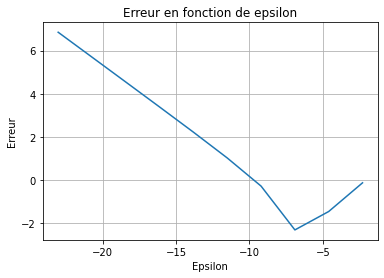

In [142]:
epsilon = [10**(-i) for i in range(1,11)]
logeps = [mp.log(eps) for eps in epsilon]
erf = []
for eps in epsilon:
    print(eps,simp(f3,-1+eps,1-eps,100)[0]) 
    erf.append(mp.log(np.abs(mp.pi-simp(f3,-1+eps,1-eps,100)[0])))
plt.plot(logeps,erf)
plt.grid()
plt.xlabel('Epsilon')
plt.ylabel('Erreur')
plt.title('Erreur en fonction de epsilon')
                      

## La quadrature de Gauss

L'approche connue sous le nom de quadrature de Gauss consiste à calculer une intégrale de la forme
$$T[f]=\int_{a}^{b}w(x)f(x)dx$$
où $f(x)$ est une fonction régulière sur tout l'intervalle $[a,b]$ et $w(x)$ est le noyau de l'intégrale, dont on suppose qu'il reste de signe constant positif. Ce noyau peut comporter des singularités intégrales comme dans le cas ci-dessus correspondant à 
$$w(x)=\frac{1}{\sqrt{1-x^2}}$$

Le principe pour calculer ce genre d'intégrale repose sur une formule approchée similaire à celle issue de méthodes telles que trapèzes ou Simpson, à savoir
$$T[f]\simeq\sum_{i=0}^N\alpha_if(x_i)$$
avec des points de références $x_i$ et des coefficients de pondération $\alpha_i$ choisis de telle sorte que la convergence de l'intégrale aux points de singularité est prise en compte dans la formulation mathématique. 

L'objectif de cette méthode est donc d'optimiser le choix de ces paramètres afin de stabiliser le calcul d'intégrales de ce genre.

Le critère de choix de ces paramètres consiste à écrire que la formule approchée est en réalité exacte pour des polynômes de degré croissant. L'intégrale étant une opération linéaire on peut se contenter des monômes élémentaires de degré croissant, avec un nombre suffisant de conditions pour que les $x_i$ et les $\alpha_i$ puissent être calculés.

La condition sous-jacente est que l'on soit en mesure de calculer les valeurs exactes de ces intégrales pour chacun des monômes élémentaires. On remplace donc un calcul numérique instable en raison de la singularité par un calcul mathématique rigoureux qui lui prend en compte la singularité et le fait qu'elle soit intégrable. On déplace donc la difficulté du numérique vers le formel. Cela implique évidemment un effort complémentaire puisqu'il faut calculer mathématiquement les intégrales élémentaires dont on a besoin.

Une autre condition sous-jacente est que la fonction $f(x)$ puisse être interpolée par des polynômes sur tout l'intervalle d'intégration sans écarts importants entre la fonction et son polynôme d'interpolation. La formule étant par construction exacte pour ce polynôme d'interpolation, on peut raisonnablement s'attendre à puvoir calculer l'intégrale avec une bonne précision.


### Les points de références $x_i$ sont fixés par avance

On considère dans un premier temps que les points de références $x_i$ sont fixés, et on cherche à optimiser le choix des coefficients de pondérations $\alpha_i$. Les points de références $x_i$ sont évidemment choisis deux à deux distincts.

On a ici $N+1$ coefficients de pondération à calculer, on va donc avoir besoin de $N+1$ condition. Pour cela on écrit l'égalité stricte pour chacun des monômes élémentaires $x^0=1$, $x^1$,... $x^N$.

On obtient ainsi $N+1$ conditions que l'on peut écrire sous la forme
$$\sum_{i=0}^N\alpha_ix_i^k=T[x^k],~~0\leq k\leq N$$
que l'on peut aussi écrire sous forme matricielle

$$\left(\begin{array}{cccc}
1 & 1 & \cdots & 1 \\
x_0 & x_1 & \cdots & x_N \\
x_0^2 & x_1^2 & \cdots & x_N^2 \\
\vdots & \vdots & \ddots & \vdots \\
x_0^N & x_1^N & \cdots & x_N^N \\
\end{array}\right)\times
\left(\begin{array}{c}
\alpha_0 \\
\alpha_1 \\
\alpha_2 \\
\cdots \\
\alpha_N
\end{array}\right)=
\left(\begin{array}{c}
T[1] \\
T[x] \\
T[x^2] \\
\cdots \\
T[x^N]
\end{array}\right)$$

La matrice est ici complètement calculable puisque les points de références $x_i$ sont choisis à l'avance. Il reste donc à calculer le vecteur second membre, et c'est là que le programmeur se transforme en mathématicien et fait le calcul de manière complètement formelle et exacte.

Il reste ensuite à inverser cette matrice pour obtenir les coefficients de pondération $\alpha_i$. La matrice est de type Van der Monde, on la sait inversible car les $x_i$ sont deux à deux distincts.


### Exemple d'application pratique

On revient à l'exemple précédent, on considère donc l'opérateur $T$ défini par
$$T[f]=\int_{-1}^{+1}\frac{f(x)}{\sqrt{1-x^2}}dx$$

Calculer $T[x^k]$ et écrire une fonction permettant d'obtenir les valeurs numériques correspondantes.

In [152]:
def facto(n):
    if n == 0:
        fact = 1
    else:
        fact = facto(n-1)*n
    return fact

def T(k):
    if k%2==0:
        return(np.pi*(facto(2*k))**2/(2**k*facto(k))**2)
    else:
        return(0)
    
print(T(2))

28.274333882308138


On peut alors par exemple considérer $2N+1$ points de références équirépartis entre $-1$ et $+1$.
Calculer les coefficients de pondération correspondant.

En déduire la valeur numérique de 
$$\int_{-1}^{+1}\frac{x^n}{\sqrt{1-x^2}}dx$$
pour $n$ variant de 0 à 20 et comparer avec la valeur théorique attendue. On pourra prendre ici $N=5$.

Qu'observer-vous si vous augmentez progressivement la valeur de N ?


### Les points de référence $x_i$ sont ajustables

Dans l'approche précédente on avait fixé des valeurs pour les points de référence $x_i$ de manière un peu arbitraire. L'idée ici est d'optimiser le choix des $x_i$ pour rendre plus performante la méthode de la quadrature de Gauss.

On a donc désormais $2(N+1)$ coefficients à trouver, les $N+1$ points de référence $x_i$ et les $N+1$ coefficients de pondération correspondants $\alpha_i$. Le principe de la méthode est similaire à l'approche précédente, à savoir exprimer l'exactitude entre la formule approchée et les valeurs attendues pour tous les monômes élémentaires de degré 0, 1, ..., $2N+1$.

Globalement on finit avec le même système que précédemment sous la forme
$$\sum_{i=0}^N\alpha_ix_i^k=T[x^k],~~0\leq k\leq 2N+1$$
La différence principale avec le cas précédent est que notre système est non linéaire, donc significativement plus complexe à résoudre.

En fait le problème est ici mal posé et c'est la raison pour laquelle on aboutit à un système non linéaire. On définit alors le polynôme intermédiaire de degré $N+1$
$$P(x)=\prod_{i=0}^N(x-x_i)=x^{N+1}+\sum_{i=0}^N\beta_ix^i$$
Notre critère d'égalité stricte entre la formule approchée et la valeur attendue est vrai pour tous les monômes $x^k$ de degré $k\leq 2N+1$, il est en particulier également vrai pour $P(x)$, $xP(x)$, ..., $x^NP(x)$.
Ainsi pour $k\leq N$ on a
$$
\begin{array}{ll}
T[x^kP(x)] & \displaystyle =T\left[x^{N+1+k}+\sum_{i=0}^N\beta_ix^{i+k}\right]=T[x^{N+1+k}]+\sum_{i=0}^N\beta_iT[x^{i+k}] \\
& \displaystyle =\sum_{i=0}^{N}\alpha_ix_i^kP(x_i)=0\end{array}$$
Ces différentes relations écrites pour $0\leq k\leq N$ nous donnent un système linéaire de $N+1$ équations à $N+1$ inconnues $\beta_i$, dont les coefficients et le second membre ne dépendent que de l'évaluation de l'opérateur $T$ pour les monômes élémentaires. Le système étant linéaire, on peut l'inverser avec des algorithmes classiques et simples, ce qui permet de calculer les coefficients du polynôme $P$.

Une fois les $\beta_i$ calculés, on est ramené au calcul des racines d'un polynôme dont on connait les coefficients. Il existe des méthodes numériques efficaces pour résoudre ce genre de problème, principalement dans le cas de polynômes de degré pas trop élevé ; en revanche dans certaines situations ce problème numérique est un non-problème puisque l'on peut obtenir les racines du polynôme de manière analytique.

Une fois les $x_i$ calculés, on est ramené à la formulation précédente.


### Synthèse de la méthode

* écriture et résolution du système linéaire $\displaystyle T[x^{N+1+k}]+\sum_{i=0}^N\beta_iT[x^{i+k}]=0,~0\leq k\leq N~\Longrightarrow$ calcul des $\beta_i$
* calcul des racines du polynôme $\displaystyle P(x)=\prod_{i=0}^N(x-x_i)=x^{N+1}+\sum_{i=0}^N\beta_ix^i~\Longrightarrow$ calcul des $x_i$
* calcul et inversion de la matrice de Van der Monde $\Longrightarrow$ calcul des $\alpha_i$

De là on en déduit la formule approchée suivante
$$\int_a^bw(x)f(x)\simeq\sum_{i=0}^N\alpha_if(x_i)$$
A noter que les valeurs $\alpha_i$ et $x_i$ ne dépendent pas de la fonction $f(x)$, elles ne dépendent que du noyau d'intégration $w(x)$ et du nombre de points de Gauss $N$.


### Lien avec les polynômes orthogonaux

L'opérateur $T$ est défini par
$$T[f]=\int_a^bw(x)f(x)dx,~\mathrm{avec}~w(x)\geq0,~\forall x\in[a,b]$$
A partir de cet opérateur $T$ on peut définir dans l'espace vectoriel des polynômes la forme bilinéaire
$$<P|Q>=\int_a^bw(x)P(x)Q(x)dx$$
dont on peut vérifier qu'elle satisfait toutes les propriétés d'un produit scalaire.

On peut alors définir une famille de polynômes orthogonaux $\{P_0, P_1,\cdots,P_n,\cdots\}$ avec les propriétés suivantes
* $P_i$ est de degré $i$ exactement
* $<P_i|P_j>=<P_i|P_i>\delta_{ij}$

A titre de rappel, ces polynômes orthogonaux satisfont une relation de récurrence à 3 termes de la forme
$$P_{n+2}(x)=(a_nx+b_n)P_{n+1}(x)+c_nP_n(x)$$
Si l'on impose en outre aux polynômes $P_i$ d'avoir un terme de plus haut degré égal à 1, on a alors $a_n=1$.

On se place dans le contexte de l'approximation sur une base de $N+1$ points de Gauss $x_i$, $0\leq i\leq N$, avec la condition que l'approximation est exacte pour tout polynôme de degré $\leq 2N+1$.

Soit donc $f$ un polynôme quelconque de degré $\leq 2N+1$ et $P_{N+1}$ le $(N+1)$ème polynôme orthogonal tel que défini ci-dessus. Par division euclidienne de $f$ par $P_{N+1}$ on peut obtenir deux polynômes $g$ et $r$, de degré $\leq N$, tels que
$$f=gP_{N+1}+r$$

On a alors par hypothèse d'exactitude de la formule d'intégration
$$T[f]=\sum_{i=0}^N\alpha_if(x_i)=\sum_{i=0}^N\alpha_ig(x_i)P_{N+1}(x_i)+\sum_{i=0}^N\alpha_ir(x_i)$$
Par linéarité de l'opérateur $T$, on a également
$$T[f]=T[gP_{N+1}+r]=T[gP_{N+1}]+T[r]=<g|P_{N+1}>+T[r]$$

Or le polynôme $g$ est de degré $\leq N$, on peut donc le décomposer de manière unique que la base $P_0,P_1,\cdots,P_N$ qui sont tous par construction orthogonaux avec $P_{N+1}$. On en déduit alors immédiatement $<g|P_{N+1}>=0$.

On en déduit finalement
$$T[f]=\sum_{i=0}^N\alpha_ig(x_i)P_{N+1}(x_i)+\sum_{i=0}^N\alpha_ir(x_i)=T[r]=\sum_{i=0}^N\alpha_ir(x_i)$$

Cette relation doit être satisfaite $\forall f$, donc $\forall g,r$. On peut ainsi en déduire que les $x_i$ ne sont autres que les racines du $(N+1)$ème polynôme orthogonal $P_{N+1}$.


### Application au calcul de l'intégrale singulière précédente

On repart du problème du calcul de l'intégrale
$$I=\int_{-1}^{+1}\frac{f(x)}{\sqrt{1-x^2}}dx$$
pour une fonction $f(x)$ régulière dans l'intervalle $[-1,+1]$.

On définit alors dans l'espace vectoriel des polynômes le produit scalaire 
$$<P|Q>=\int_{-1}^{+1}\frac{P(x)Q(x)}{\sqrt{1-x^2}}dx$$

La famille des polynômes orthogonaux satisfait les caractéristiques suivantes
* $T_0(x)=1$
* $T_1(x)=x$
* $T_{n+2}(x)=2xT_{n+1}(x)-T_{n}(x)$
* $T_n(x)\propto \cos\left[n\cos^{-1}(x)\right]$

On retrouve ici la famille des polynômes de Tchebychev. Ainsi les racines de $T_{N+1}$ sont
$$x_i=\cos\left(\frac{1}{N+1}\left(i\pi+\frac{\pi}{2}\right)\right)$$

Dans ce cas on peut démontrer que les coefficients $\alpha_i$ sont tous égaux à $\pi/(N+1)$.

Appliquer la quadrature de Gauss pour calculer
$$\int_{-1}^{+1}\frac{x^n}{\sqrt{1-x^2}}dx$$

pour $n$ variant de 0 à 20 et comparer avec la valeur théorique attendue. On pourra étudier en particulier l'influence du nombre de points de Gauss choisi pour le calcul.
